# 모델을 위한 데이터 수집

In [69]:
from sklearn.datasets import load_iris

iris = load_iris()

#x값
iris_data = iris.data
iris_data #4개의 특성 x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [70]:
#y값
iris_label = iris.target
iris_label, iris.target_names, iris.feature_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [71]:
import pandas as pd

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 데이터 분할

train/test hold out

In [72]:
from sklearn.model_selection import train_test_split
#X : features
#y : label 실제값

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11 )


# 모델 생성

In [73]:
from sklearn.tree import DecisionTreeClassifier

#dt_clf : 예측기 Estimator
dt_clf = DecisionTreeClassifier(random_state=11)

# 모델 학습
dt_clf.fit(X_train,y_train )


DecisionTreeClassifier(random_state=11)

# 예측

In [74]:
#테스트용 피처 값을 입력 > 예측 라벨값
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [75]:
#정답 y_test, pred의 예측값 비교 > 정답율(점수)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

# 훈련/테스트 데이터 분할 "홀드 아웃"

# 교차검증 CrossValidation

In [76]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

df_clf = DecisionTreeClassifier(random_state=156)


In [77]:
import numpy as np

features = iris.data
label = iris.target
cv_accuracy = []

fold_data = []

for train_index, test_index in kfold.split(features) : #5개로 분할
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    
    accuracy = np.round(accuracy_score(y_test, pred),4)
    print(X_train.shape[0], X_test.shape[0])

    cv_accuracy.append(accuracy)
    fold_data.append((X_train, y_train, X_test, y_test))

print(cv_accuracy, np.mean(cv_accuracy))

120 30
120 30
120 30
120 30
120 30
[1.0, 0.9667, 0.8667, 0.9333, 0.7333] 0.9


In [104]:
X_train[:3], y_train[:3], X_test[:3], y_test[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [6.9, 3.2, 5.7, 2.3],
        [7.7, 2.8, 6.7, 2. ]]),
 array([0, 2, 2]),
 array([[6.8, 3. , 5.5, 2.1],
        [6.7, 3. , 5.2, 2.3],
        [6.3, 2.8, 5.1, 1.5]]),
 array([2, 2, 2]))

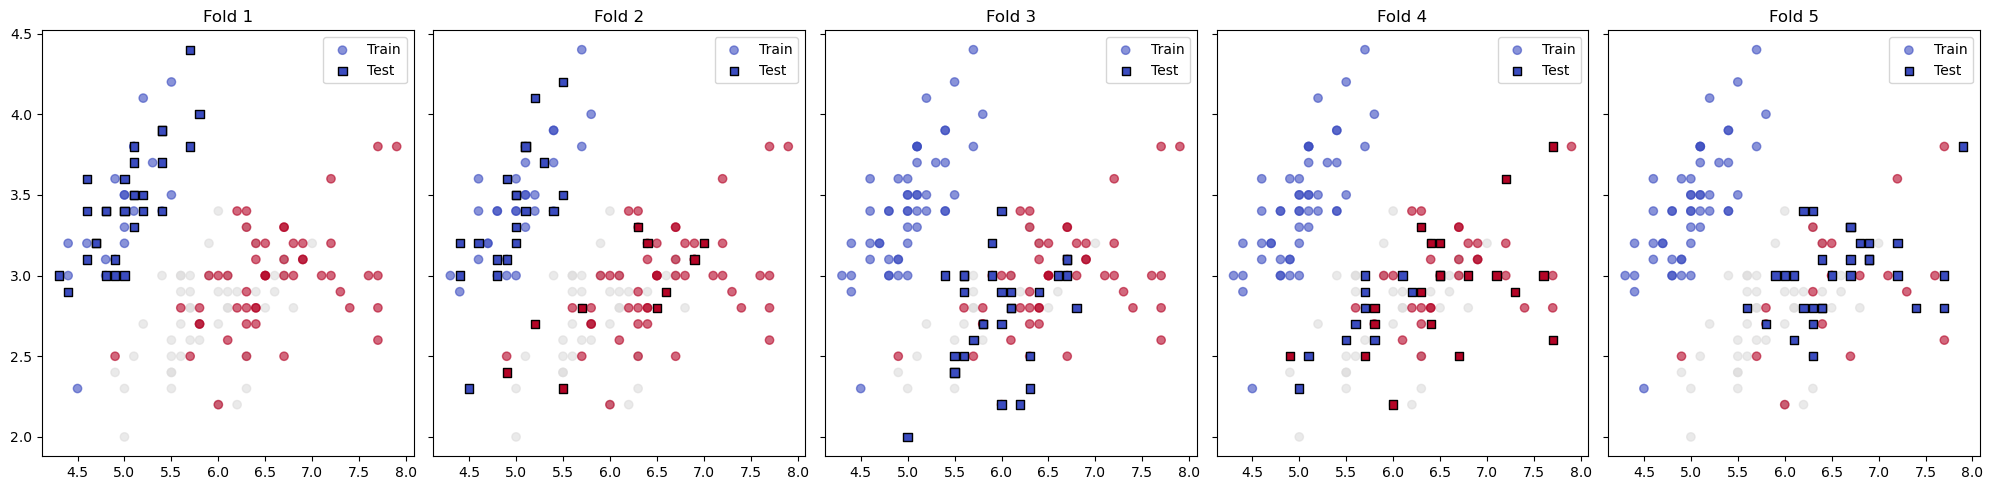

In [78]:
import matplotlib.pyplot as plt

# 교차 검증 데이터의 분포 시각화 sepal.length, sepal.width
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)
for i, (X_train, y_train, X_test, y_test) in enumerate(fold_data):
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, label='Train')
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='s', label='Test')
    axes[i].set_title(f'Fold {i + 1}')
    axes[i].legend()

plt.tight_layout()
plt.show()


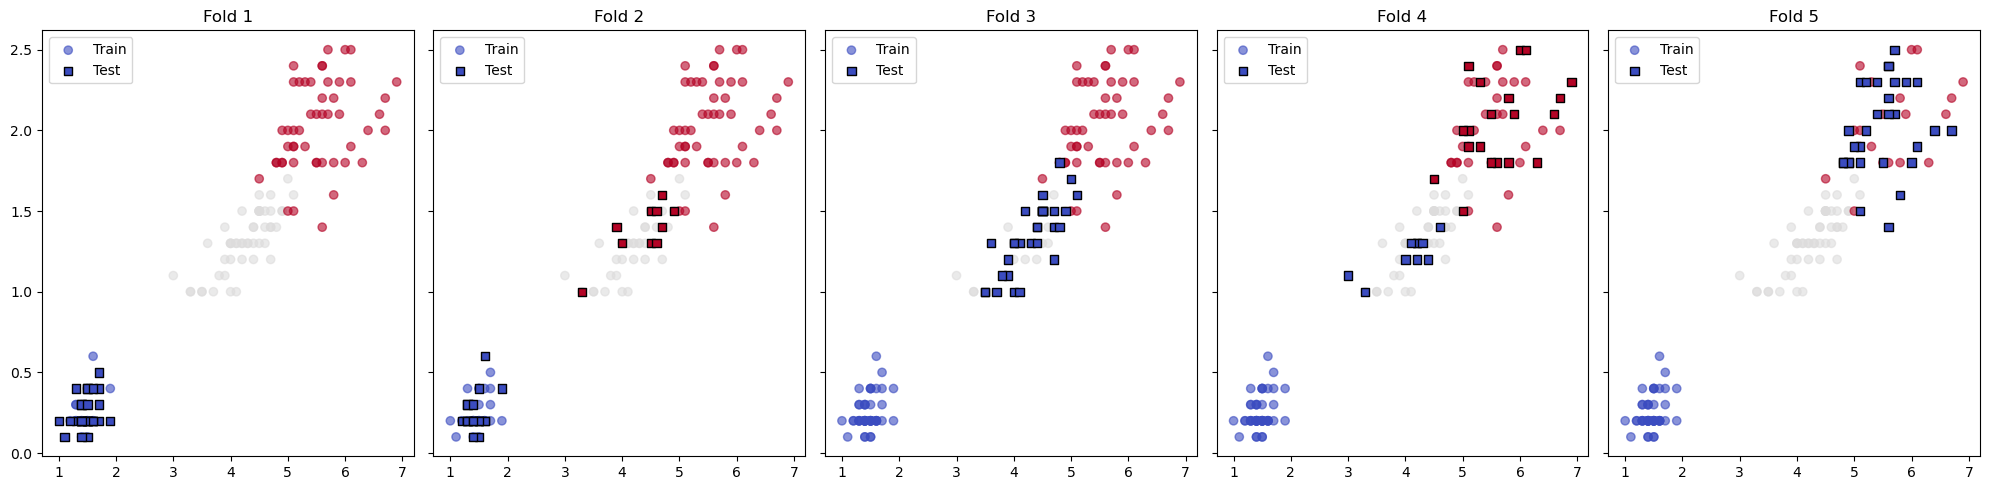

In [105]:

# 교차 검증 데이터의 분포 시각화 petal.length, petal.width
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)
for i, (X_train, y_train, X_test, y_test) in enumerate(fold_data):
    axes[i].scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='coolwarm', alpha=0.6, label='Train')
    axes[i].scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap='coolwarm', edgecolor='k', marker='s', label='Test')
    axes[i].set_title(f'Fold {i + 1}')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Stratified k-Fold Cross Validation

데이터의 분포

In [79]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns= iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [80]:
# k-fold = 3

In [81]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 

n_iter =0
for train_index, test_index  in kfold.split(iris_df):

    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


# stratified split 분포 확인

In [82]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

for train_index, test_index in skf.split(iris_df, iris_df['label']) :
    label_train = iris_df[ 'label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]

    print( f'train 분포 : {label_train.value_counts()} ' )
    print( f'test 분포 : {label_test.value_counts()}' )
    print('*'*20)
    

train 분포 : label
2    34
0    33
1    33
Name: count, dtype: int64 
test 분포 : label
0    17
1    17
2    16
Name: count, dtype: int64
********************
train 분포 : label
1    34
0    33
2    33
Name: count, dtype: int64 
test 분포 : label
0    17
2    17
1    16
Name: count, dtype: int64
********************
train 분포 : label
0    34
1    33
2    33
Name: count, dtype: int64 
test 분포 : label
1    17
2    17
0    16
Name: count, dtype: int64
********************


# 교차검증 모델 생성

In [83]:
dt_clf = DecisionTreeClassifier(random_state=156)
skfold = StratifiedKFold(n_splits=3)
cv_accuracy = []

for train_index, test_index in skfold.split(features, label) :
    
    # 데이터 분할
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 모델 학습 (n=3)
    dt_clf.fit(X_train, y_train)

    # 예측
    pred = dt_clf.predict(X_test)

    # 정확도 검증
    cv_accuracy.append(accuracy_score(y_test, pred))


cv_accuracy, np.mean(cv_accuracy)

([0.98, 0.94, 0.98], 0.9666666666666667)

# cross_val_score()

In [84]:
dt_clf1 = DecisionTreeClassifier(random_state=156)

In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf1, features, label, scoring='accuracy', cv=3 )
scores, np.mean(scores)

(array([0.98, 0.94, 0.98]), 0.9666666666666667)

# GridSearchCV - 하이퍼파라미터 튜닝 + 교차 검증

In [86]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=121 )
dt_clf2 = DecisionTreeClassifier(random_state=121) #estimator

#parameter grid
parameters = { 'max_depth':[1,2,3], 'min_samples_split':[2,3] }

In [87]:
from sklearn.model_selection import GridSearchCV

#model, model의 하이퍼파라미터의 목록, 교차검증파라미터 부여하고 한번에 모델을 만든다.
grid_dtree = GridSearchCV(dt_clf2, param_grid=parameters, cv=3, refit=True)


In [88]:
#학습 - 최적의 모델 파라미터를 찾는다
grid_dtree.fit(X_train,y_train )

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=121),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [89]:
# 학습 결과
score_df = pd.DataFrame(grid_dtree.cv_results_)
score_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000667,4.717638e-04,0.000667,0.000472,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.001001,1.123916e-07,0.000334,0.000472,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.000667,4.718761e-04,0.000667,0.000472,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.000667,4.718764e-04,0.000334,0.000472,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.000667,4.718761e-04,0.000334,0.000472,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.000334,4.718199e-04,0.000667,0.000472,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


# 최적의 파라미터와 정확도

In [90]:
grid_dtree.best_params_, grid_dtree.best_score_

({'max_depth': 3, 'min_samples_split': 2}, 0.975)

In [91]:
#최적의 모델
estimator = grid_dtree.best_estimator_

#예측
pred = estimator.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

# 피처 스케일링 - StandardScaler


In [92]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [93]:
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)

iris_scaled = scaler.transform(iris_df)
iris_scaled.mean() #0에 가까운 값

-1.4684549872375404e-15

In [95]:
iris_scaled.var()

1.0

# 스케일링한 데이터로 모델 생성

In [96]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11 )


In [97]:
no_scaling_model = LogisticRegression(random_state=11)
no_scaling_model.fit(X_train, y_train)  # 모델 학습
y_pred1 = no_scaling_model.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy1

0.9333333333333333

In [98]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaling_model = LogisticRegression(random_state=11)
scaling_model.fit(X_train_scaled, y_train)  # 모델 학습


LogisticRegression(random_state=11)

In [99]:
# 예측 및 평가
y_pred = scaling_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

# MinMaxScaler

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(iris_df)

iris_scaled_1 = scaler1.transform(iris_df)

iris_df_scaled_1 = pd.DataFrame(data=iris_scaled_1, columns=iris.feature_names)
iris_df_scaled_1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [101]:
iris_df_scaled_1.min(), iris_df_scaled_1.max()

(sepal length (cm)    0.0
 sepal width (cm)     0.0
 petal length (cm)    0.0
 petal width (cm)     0.0
 dtype: float64,
 sepal length (cm)    1.0
 sepal width (cm)     1.0
 petal length (cm)    1.0
 petal width (cm)     1.0
 dtype: float64)

# 129 페이지 타이타닉 데이터로 분류 모델
- 전처리 : 스케일링
- 교차검증 : cross_val_score()